In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr

In [4]:
df = pd.read_excel("./COVID-19 10.04.2020.xlsx", sheet_name="Cases_Time_Series")
df1 = pd.read_excel("./COVID-19 10.04.2020.xlsx", sheet_name="Cases_Time_Series", parse_dates=["Date"], index_col="Date")

In [6]:
df.head(74)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0
1,2020-01-31,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-02-01,0.0,1.0,0.0,0.0,0.0,0.0
3,2020-02-02,1.0,2.0,0.0,0.0,0.0,0.0
4,2020-02-03,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
69,2020-04-08,565.0,5916.0,96.0,565.0,20.0,183.0
70,2020-04-09,813.0,6728.0,70.0,635.0,46.0,230.0
71,2020-04-10,871.0,7599.0,151.0,786.0,22.0,252.0
72,2020-04-11,854.0,8453.0,186.0,972.0,40.0,292.0


c:\python 3.8.2\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



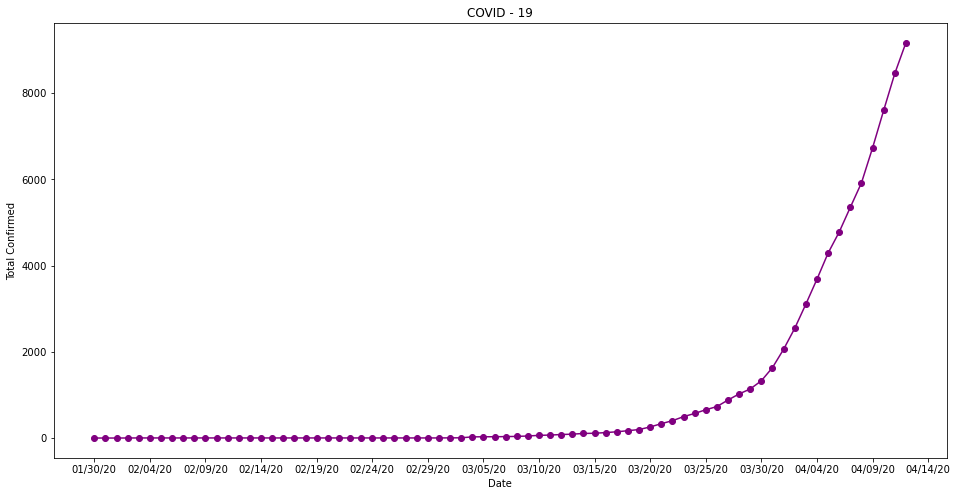

In [120]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(16,8))

# Add the x-axis and the y-axis to the plot
ax.plot(df1.index.values,
        df1['Total Confirmed'], '-o',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Confirmed",
       title="COVID - 19")

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(DateFormatter("%m/%d/%y"))

plt.show()

In [98]:
fig  = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'][0:74],
    y=df['Total Confirmed'],
    name="Total Confirmed"       # this sets its legend entry
))

fig.update_layout(
    title="COVID 19",
    xaxis_title="Date",
    yaxis_title="Total Confirmed",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

In [99]:
def expo_line(df,n):
    pre_value_expo=[]
    for i in range(n):
        pre_value_expo.append((df[0])*((2.718281828459)**((np.log(df[len(df)-1]/df[0])/len(df))*i)))
    return pre_value_expo
#pearsonr(df['India'][0:59],pre_value_expo[0:59])

def err(df,n):
    pre_value_expo=expo_line(df,n)
    corr, _ = pearsonr(df[0:len(df)-1],expo_line(df,n)[0:len(df)-1])
    #print('Pearsons correlation: %.3f' % corr)
    er=(100-(float(corr)*100))
    return er

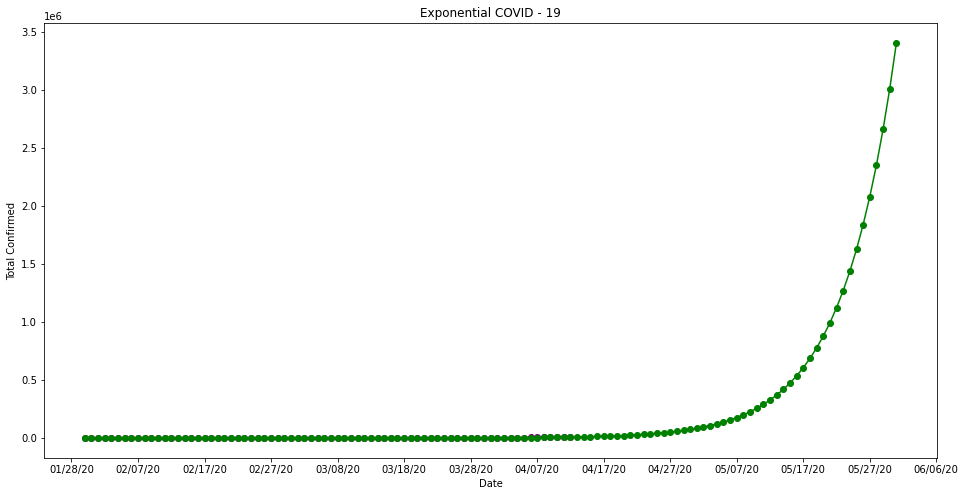

In [124]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(16,8))

# Add the x-axis and the y-axis to the plot
ax.plot(df1.index.values,
        df1['Total Confirmed'], '-o',
        color='purple')
ax.plot(df1.index.values,
        expo_line(df['Total Confirmed'][0:74],123), '-o',
        color='green')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Confirmed",
       title="Exponential COVID - 19")

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(DateFormatter("%m/%d/%y"))

plt.show()

In [101]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Total Confirmed'],
    name="Total Confirmed"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=df['Date'],
    y=expo_line(df['Total Confirmed'][0:74],123),
    line=dict(color="#02fa59"),
    name="Exponential Value"
))

fig.update_layout(
    title="COVID 19",
    xaxis_title="Date",
    yaxis_title="Total Confirmed",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

In [102]:
pre_value_expo=expo_line(df['Total Confirmed'][0:74],123)


In [103]:
#pearsonr(df['India'][0:59],pre_value_expo[0:59])
# corr, _ = pearsonr(df['Total Confirmed'][0:74],pre_value_expo[0:74])
# print('Pearsons correlation: %.3f' % corr)
# er=(100-(float(corr)*100))

In [111]:
er = 10 # 10% error
pr_arr_5=[]
for i in range(75,123):
    pr_arr_5.append((pre_value_expo[i])*(er/100))

In [112]:
pr_arr_top=[]
pr_arr_low=[]
pr_arr_top.append(pre_value_expo[74])
pr_arr_low.append(pre_value_expo[74])
for i in range(len(pr_arr_5)):
    pr_arr_top.append((pre_value_expo[75:123][i])+pr_arr_5[i])
    pr_arr_low.append((pre_value_expo[75:123][i])-pr_arr_5[i])

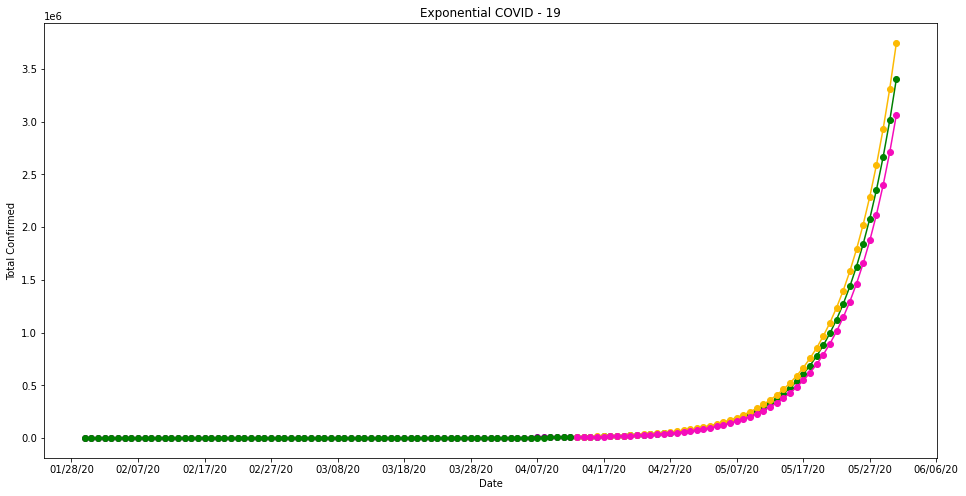

In [126]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(16,8))

# Add the x-axis and the y-axis to the plot
ax.plot(df1.index.values,
        df1['Total Confirmed'], '-o',
        color='purple')
ax.plot(df1.index.values,
        expo_line(df['Total Confirmed'][0:74],123), '-o',
        color='green')

ax.plot(df['Date'][74:123],
        pr_arr_top, '-o',
        color='#fcba03')

ax.plot(df['Date'][74:123],
        pr_arr_low, '-o',
        color='#f50cbb')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Confirmed",
       title="Exponential COVID - 19")

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(DateFormatter("%m/%d/%y"))

plt.show()

In [114]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Total Confirmed'],
    name="Total Confirmed"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=df['Date'],
    y=expo_line(df['Total Confirmed'][0:74],123),
    line=dict(color="#02fa59"),
    name="Exponential Value"
))

fig.add_trace(go.Scatter(
    x=df['Date'][74:123],
    y=pr_arr_top,
    line=dict(color="#fcba03"),
    name="Prediction Error Value Top"
))

fig.add_trace(go.Scatter(
    x=df['Date'][74:123],
    y=pr_arr_low,
    line=dict(color="#f50cbb"),
    name="Prediction Error Value Low"
))

fig.update_layout(
    title="COVID 19",
    xaxis_title="Date",
    yaxis_title="Total Confirmed",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()